In [1]:
from astropy.io import fits
from astropy.table import Table
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
fits_image_filename = fits.open("/Users/matt/Desktop/DESI_Research/Intro_to_fits/tile_100000.fits")

hdul = fits_image_filename

data1 = hdul["FIBERASSIGN"].data 

data2 = hdul["POTENTIAL"].data

In [12]:
#hdul.info()

In [4]:
fiber_data1 = Table(hdul["FIBERASSIGN"].data)

fiber_data1

FIBER,LOCATION,NUMTARGET,PRIORITY,TARGETID,DESI_TARGET,BGS_TARGET,MWS_TARGET,RA,DEC,XFOCAL_DESIGN,YFOCAL_DESIGN,BRICKNAME,FIBERMASK
int32,int32,int16,int32,int64,int64,int64,int64,float64,float64,float32,float32,str8,int32
0,95,5,1,-1,0,0,0,29.416909735516672,-4.28212413119413,-4.134643,-176.01639,notbrick,4
1,62,2,1,-1,0,0,0,29.58667004906363,-4.35837668858977,-45.58638,-157.1347,notbrick,4
2,102,1,1,-1,0,0,0,29.596883309851247,-4.208321135788345,-48.26472,-194.58679,notbrick,2
3,82,3,1,-1,0,0,0,29.52916260861867,-4.295863937341604,-31.579592,-172.63538,notbrick,2
4,131,2,1,-1,0,0,0,29.372787297103333,-4.180777308685733,6.672006,-201.3858,notbrick,2
5,108,2,1,288230450420253444,4294967296,0,0,29.361867904663086,-4.266130447387695,9.327732,-180.01004,0294m042,0
6,119,2,1,288230450420253383,4294967296,0,0,29.35671043395996,-4.198378562927246,10.6086445,-196.96909,0294m042,0
7,64,3,1,288230450420252753,4294967296,0,0,29.49448013305664,-4.359685897827148,-23.062443,-156.74832,0294m042,0
8,72,2,1,288230450420252928,4294967296,0,0,29.553428649902344,-4.326733589172363,-37.48888,-164.96867,0296m042,0


In [5]:
fiber_data2 = Table(hdul["POTENTIAL"].data)

fiber_data2

POTENTIALTARGETID
int64
288230450420252759
288230450420252747
288230450420252692
288230450420253273
288230450420252692
288230450420252777
288230450420252817
288230450420253153
288230450420252721


In [6]:
#data1.columns

In [7]:
DESI_target = data1.field("DESI_TARGET")
BGS_target = data1.field("BGS_TARGET")
MWS_target = data1.field("MWS_TARGET")
RA = data1.field("RA")
DEC = data1.field("DEC")

#np.shape(Desi_target)

In [8]:
newDESI = DESI_target > 0.

type(newDESI)

numpy.ndarray

In [9]:
def mini_tile_new(survey_name1, survey_name2, survey_name3):
    
    new_survey_name1 = survey_name1 > 0. # figure out how to put in two conditions into this query
    
    new_survey_name2 = survey_name2 > 0.
    
    new_survey_name3 = survey_name3 > 0.
    
    #cross_match_1_2 = [ s for s in new_survey_name1 if s in new_survey_name2 and s>0.] 
    
    cross_match_1_2 = (survey_name1 > 0.) & (survey_name2 > 0.)
    #[ s>0. and s in new_survey_name1 for s in new_survey_name2 ] # 5000 entries w 85 T's
    
    
    cross_match_1_3 = (survey_name1 > 0.) & (survey_name3 > 0.)
    #[ s for s in new_survey_name1 if s in new_survey_name3 and s>0.] # number of entries is equal to total T's
    
    #new_survey_name4 = # this one wants two conditions ie survey_name1 & survey_name2
    
    new_survey_name1_RA = (RA[new_survey_name1])
    new_survey_name1_DEC = (DEC[new_survey_name1])
    
    new_survey_name2_RA = (RA[new_survey_name2])
    new_survey_name2_DEC = (DEC[new_survey_name2])
    
    new_survey_name3_RA = (RA[new_survey_name3])
    new_survey_name3_DEC = (DEC[new_survey_name3])
    
    cross_match_1_2_RA = (RA[cross_match_1_2])
    cross_match_1_2_DEC = (DEC[cross_match_1_2])
    
    #print("RA length: ", len(RA), "\ncross match 1-3 RA length: ", len(cross_match_1_3))
    #print("RA length: ", len(RA), "\nnew survey name 3 RA length: ", len(new_survey_name3))
    
    cross_match_1_3_RA = (RA[cross_match_1_3])
    cross_match_1_3_DEC = (DEC[cross_match_1_3])
    
    
    return new_survey_name1_RA, new_survey_name1_DEC,\
            new_survey_name2_RA, new_survey_name2_DEC,\
            new_survey_name3_RA, new_survey_name3_DEC,\
            cross_match_1_2_RA, cross_match_1_2_DEC,\
            cross_match_1_3_RA, cross_match_1_3_DEC,


In [10]:
tile_DESI_RA, tile_DESI_DEC,\
tile_BGS_RA, tile_BGS_DEC,\
tile_MWS_RA,tile_MWS_DEC,\
tile_DESI_cross_BGS_RA, tile_DESI_cross_BGS_DEC,\
tile_DESI_cross_MWS_RA, tile_DESI_cross_MWS_DEC  = mini_tile_new(DESI_target,BGS_target, MWS_target)

#tile_DESI_cross_MWS_RA, #tile_DESI_cross_MWS_DEC 
# backslash acts as enter

len RA DESI/BGS:  201
len DEC DESI/BGS:  201
len RA DESI/MWS:  0
len DEC DESI/MWS:  0
len RA DESI:  4902
len DEC DESI:  4902
len RA BGS:  201
len DEC BGS:  201
len RA MWS:  0
len DEC MWS:  0


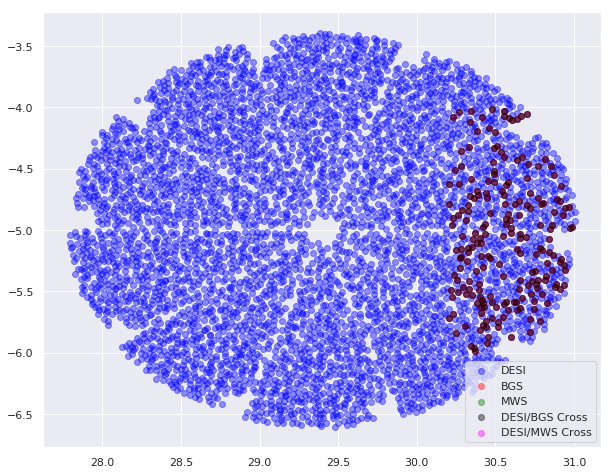

In [11]:
print("len RA DESI/BGS: ", len(tile_DESI_cross_BGS_RA))
print("len DEC DESI/BGS: ", len(tile_DESI_cross_BGS_DEC))

print("len RA DESI/MWS: ", len(tile_DESI_cross_MWS_RA))
print("len DEC DESI/MWS: ", len(tile_DESI_cross_MWS_DEC))

print("len RA DESI: ", len(tile_DESI_RA))
print("len DEC DESI: ", len(tile_DESI_DEC))

print("len RA BGS: ", len(tile_BGS_RA))
print("len DEC BGS: ", len(tile_BGS_DEC))

print("len RA MWS: ", len(tile_MWS_RA))
print("len DEC MWS: ", len(tile_MWS_DEC))

plt.figure(figsize=(10,8))
plt.scatter(tile_DESI_RA,tile_DESI_DEC, alpha = 0.4, color = 'blue', label ='DESI')
plt.scatter(tile_BGS_RA,tile_BGS_DEC, alpha = 0.4, color = 'red', label ='BGS')
plt.scatter(tile_MWS_RA,tile_MWS_DEC, alpha = 0.4, color = 'green', label ='MWS')
plt.scatter(tile_DESI_cross_BGS_RA, tile_DESI_cross_BGS_DEC, alpha = 0.4, color = "black", label = "DESI/BGS Cross")
plt.scatter(tile_DESI_cross_MWS_RA, tile_DESI_cross_MWS_DEC, alpha = 0.4, color = "magenta", label = "DESI/MWS Cross")
plt.legend()
plt.show()